# Ejercicio

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from pickle import dump

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
pd.set_option('display.max_columns', None)
df.head(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

# EDA

In [20]:
df.shape

(3140, 108)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [22]:
(df.isnull().mean()*100).max()

np.float64(0.0)

No hay valores nulos.

In [23]:
df = df.drop_duplicates().reset_index(drop = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


No habIa valores duplicados. Vemos que hay dos variables que son de tipo object que no podremos tener en cuenta para la regresión.

In [25]:
df = df.drop(['fips'], axis=1)
df

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.362847,2244,9.018930,

Normalización de los datos

In [32]:
numericas =  [c for c in list(df.dtypes[df.dtypes != "object"].index) if c != "Heart disease_number"] # Me da el nombre de las columnas numéricas
scaler = StandardScaler()
norm_features = scaler.fit_transform(df[numericas])

df_sc = pd.DataFrame(norm_features, index = df.index, columns = numericas)
df_sc["Heart disease_number"] = df["Heart disease_number"]
df_sc.head()

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,-0.122010,1.515069,-0.138129,0.263445,-0.176461,-1.067889,-0.156294,-0.503639,-0.167598,-0.724248,-0.155953,-0.475265,-0.051455,0.710731,-0.196442,-0.241496,-0.124761,-0.115433,-0.087858,-0.030480,-0.165397,-0.191608,-0.145679,-0.154872,-0.316235,0.250655,-0.284799,0.344613,-0.513170,0.060785,-0.045366,-0.117586,-0.132905,-0.158201,-0.145939,-0.333019,-0.234382,-0.447577,0.649528,-0.125899,-0.221739,-0.202843,-0.043632,0.472531,0.370220,0.566185,-0.151210,-0.151024,-0.152525,-0.353571,0.472531,1.468943,-0.894491,-0.934081,-0.856179,-0.846273,-0.017028,0.110809,-0.154944,-0.256149,-0.117965,-0.171894,-0.173594,-0.175321,-0.210637,-0.143727,-0.175907,-1.013112,-1.936434,-0.952441,-0.148472,0.126376,0.116487,0.087963,-0.133552,0.172860,0.177849,0.154082,-0.135426,-0.402548,-0.380391,-0.392897,-0.211219,-0.256304,-0.206071,-0.138900,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,3345
1,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,0.332513,0.715673,0.382732,0.153177,0.521999,0.215895,0.676174,0.543366,0.442092,-0.284722,0.466348,0.170748,0.093946,-0.027772,0.067848,-0.203651,-0.083125,-0.141497,-0.049532,-0.076506,0.094029,-0.219210,0.341296,1.518514,-0.057592,-0.264720,-0.024296,-0.173131,-0.282330,2.122197,2.080476,0.153846,0.427106,0.424717,

División train test

In [34]:
X = df_sc.drop(columns='Heart disease_number', axis=1)
y = df['Heart disease_number']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,-0.232556,-0.227731,0.106699,-0.234284,0.171904,-0.232951,-0.418879,-0.226353,-0.663894,-0.231316,-0.672988,-0.229599,0.581859,-0.233425,0.519502,-0.234680,0.379332,-0.234420,-0.128169,-0.229069,0.647127,-0.230778,-0.557936,-0.166413,-0.095487,-0.138252,-0.427173,-0.111128,-0.103010,-0.216741,-0.287730,-0.232556,-0.152000,-0.338894,0.052434,-0.135940,0.122723,0.179349,0.305359,0.341151,-0.162117,-0.245517,-0.237489,-0.232259,0.108842,0.154941,0.186391,-0.293986,-0.203022,0.055545,0.246196,0.161446,-0.172093,-0.050056,-0.286684,-0.231210,-0.233275,-0.178637,1.310019,-0.172093,-0.025497,0.758577,0.746433,0.783163,0.717713,0.215778,-0.066711,-0.265998,-0.209960,-0.296253,-0.200967,-0.212643,-0.208590,-0.281569,-0.231195,-0.229737,0.478624,-0.284079,0.217775,-0.233171,0.455611,0.414818,0.479739,-0.234370,0.792827,0.760310,0.831329,-0.232975,0.848656,0.800427,0.857050,0.940367,0.845366,0.980076,-0.223516,0.229998,0.195197,0.299632,-0.218609,0.622848,0.554308,0.635465,-0.219329,0.903618
2302,-0.158676,-0.178665,-0.747469,-0.180166,-0.813690,-0.188266,-0.724196,-0.175070,-0.786006,-0.161168,-0.063447,-0.134688,1.251357,-0.105618,1.165547,-0.119270,0.435977,-0.091822,0.636954,-0.126439,0.757177,-0.226438,-0.565467,-0.225911,-0.276155,-0.135016,-0.386454,-0.106109,-0.101358,-0.198513,-0.555132,-0.158676,-0.382988,-0.189969,-0.581873,1.017714,-1.036036,-0.513170,-0.646734,-0.748124,-0.125402,-0.007424,-0.182866,-0.190434,-0.506607,1

In [37]:
k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(f_regression, k = k) # Elige las k variables con mas correlación con la variable objetio
selection_model.fit(X_train, y_train)


selected_columns = X_train.columns[selection_model.get_support()] # Obtengo los nombres de las variables selccionadas por selectkBest
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()


,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,POP_ESTIMATE_2018,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Total nurse practitioners (2019),Total physician assistants (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,-0.229069,-0.232556,-0.245517,-0.237489,-0.232259,-0.203022,-0.231210,-0.233275,-0.178637,-0.265998,-0.209960,-0.212643,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,-0.126439,-0.158676,-0.007424,-0.182866,-0.190434,-0.126996,-0.172162,-0.173861,-0.129283,-0.160316,-0.063930,-0.116680,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,-0.187194,-0.199114,-0.157678,-0.212248,-0.225012,-0.205040,-0.204984,-0.205183,-0.196284,-0.215815,-0.271374,-0.192263,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,-0.044020,-0.036595,0.021856,0.017843,-0.089371,-0.098094,-0.039603,-0.038050,-0.074907,-0.171032,0.021187,0.062458,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,0.126315,0.090839,0.280058,0.170026,-0.032765,0.203359,0.067488,0.066377,0.091951,0.044000,0.262528,0.274818,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454


## REgresión lineal

Inicialización y entrenamiento del modelo

In [42]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(X_train_sel, y_train)

LinearRegression()

Coeficientes encontrados

In [43]:
# Coeficientes
print(f"Intercepto (a): {model_lin_reg.intercept_}")
print(f"Coeficientes (b1, b2): {model_lin_reg.coef_}")

Intercepto (a): 5596.660023153462
Coeficientes (b1, b2): [ 1.29661028e+15 -1.44506103e+14 -1.46155156e+14 -1.71364416e+14
 -1.69336245e+14 -1.50260755e+14 -1.47663001e+14 -1.19312788e+14
 -7.01233325e+13 -4.16982220e+13  1.84089155e+03 -1.43585947e+14
  1.61858272e+03  1.43836029e+02  1.91820727e+03  1.64979348e+03
  4.20512945e+02  4.94085938e+02 -1.26112500e+03 -5.42179688e+02
  2.59257812e+02 -7.28710938e+02 -5.58718750e+02 -1.82216875e+04
  8.38444531e+03  4.35699766e+04 -7.20367188e+02  2.24853125e+03
  5.20331250e+03  2.27750000e+03  3.01828906e+03]


Predicción

In [44]:
y_pred = model_lin_reg.predict(X_test_sel)
y_pred

array([7.08927620e+02, 1.31581266e+04, 1.69132407e+03, 6.90518113e+03,
       1.12430922e+04, 1.40173898e+03, 7.59185450e+02, 1.32060462e+03,
       3.94899511e+02, 6.89748880e+02, 1.29594959e+03, 2.31076380e+02,
       4.33777852e+03, 1.41636449e+03, 9.21259553e+03, 2.47833048e+03,
       5.40710545e+04, 1.22937701e+03, 1.93275621e+03, 4.42196913e+02,
       1.52402194e+03, 6.93718719e+02, 8.51322084e+02, 5.94222806e+02,
       9.79820725e+04, 2.43278949e+03, 8.87123134e+02, 2.13302258e+03,
       8.65380554e+02, 1.88854693e+02, 1.16751968e+03, 1.82603064e+03,
       2.63030322e+03, 3.20842218e+03, 8.75205164e+03, 1.54108047e+03,
       2.62752917e+03, 1.24292706e+03, 8.67142036e+02, 1.79085933e+03,
       1.37031042e+03, 9.06080959e+03, 3.84194411e+02, 1.52562915e+02,
       2.61448165e+03, 7.21225635e+02, 3.46592319e+02, 7.71861932e+03,
       1.08380586e+03, 7.63384365e+02, 1.82805797e+04, 3.23818776e+02,
       1.44024910e+03, 5.55710415e+02, 8.49567214e+03, 7.58510581e+02,
      

Comprobación de la precisión del modelo

In [45]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación (R^2): {r2_score(y_test, y_pred)}")

Error cuadrático medio: 193562.83937402218
Coeficiente de determinación (R^2): 0.9977884971777302


## Regresión lineal ridge

In [48]:
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_sel, y_train)

Ridge()

In [50]:
y_pred_ridge = model_ridge.predict(X_test_sel)
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"Coeficiente de determinación (R^2): {r2_score(y_test, y_pred_ridge)}")

Error cuadrático medio: 167202.45121690253
Coeficiente de determinación (R^2): 0.9980896710652084


## Regresión lineal Lasso


In [51]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train_sel, y_train)

c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.895e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [52]:
y_pred_lasso = model_lasso.predict(X_test_sel)
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Coeficiente de determinación (R^2): {r2_score(y_test, y_pred_lasso)}")

Error cuadrático medio: 203184.2646555499
Coeficiente de determinación (R^2): 0.9976785700386515


Se obtienen mejores coeficientes con el modelo Ridge, aunque son prácticamente iguales

## Optimización

In [57]:
parametro = {'alpha': np.linspace(0.01, 10.0, 200)}
grid = GridSearchCV(Ridge(), parametro, cv=5)
grid.fit(X_train_sel, y_train)

print(f"Mejor alpha para Ridge: {grid.best_params_['alpha']}")

Mejor alpha para Ridge: 0.01


In [58]:
model_lasso_opt = Lasso(alpha=0.01)
model_lasso_opt.fit(X_train_sel, y_train)

c:\Users\Sergio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.827e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [59]:
y_pred_lasso_opt = model_lasso.predict(X_test_sel)
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_lasso_opt)}")
print(f"Coeficiente de determinación (R^2): {r2_score(y_test, y_pred_lasso_opt)}")

Error cuadrático medio: 203184.2646555499
Coeficiente de determinación (R^2): 0.9976785700386515


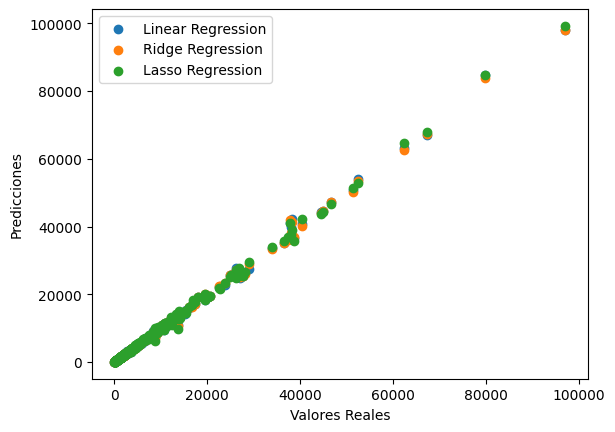

In [62]:
plt.scatter(y_test, model_lin_reg.predict(X_test_sel), label='Linear Regression')
plt.scatter(y_test, model_ridge.predict(X_test_sel), label='Ridge Regression')
plt.scatter(y_test, model_lasso.predict(X_test_sel), label='Lasso Regression')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

A penas notamos diferencias entre las predicciones de cada modelo y los valores reales dados y_test

## Guardado del modelo

In [64]:
dump(model_ridge, open("regularized_linear_regression_heart_disease_ridge_42.sav", "wb"))